In [5]:
import pandas as pd
import numpy as np

In [135]:
mc_example = {'NYC': [.25,0,.75,1],
              'Paris': [.25,.25,0,0],
              'Cairo': [.25,.25,.25,0],
              'Seoul': [.25,.5,0,0]}

mc = pd.DataFrame(data = mc_example, index = ['NYC', 'Paris', 'Cairo', 'Seoul'])
mc

,NYC,Paris,Cairo,Seoul
NYC,0.25,0.25,0.25,0.25
Paris,0.00,0.25,0.25,0.50
Cairo,0.75,0.00,0.25,0.00
Seoul,1.00,0.00,0.00,0.00


In [136]:
mc.iloc[0].index

Index(['NYC', 'Paris', 'Cairo', 'Seoul'], dtype='object')

In [137]:
mc.iloc[0]

NYC      0.25
Paris    0.25
Cairo    0.25
Seoul    0.25
Name: NYC, dtype: float64

In [138]:
np.random.choice(mc.iloc[0].index, p=mc.iloc[0])

'Seoul'

In [139]:
mc.index.get_loc('Paris')

1

In [140]:
mc.iloc[mc.index.get_loc('Paris')].index

Index(['NYC', 'Paris', 'Cairo', 'Seoul'], dtype='object')

In [141]:
mc.iloc[mc.index.get_loc('Paris')]

NYC      0.00
Paris    0.25
Cairo    0.25
Seoul    0.50
Name: Paris, dtype: float64

In [142]:
travel_sim = []

# get row 0th, then get index of item 0th -> NYC
city = mc.iloc[3].index[3]

# append into travel_sim
travel_sim.append(city)

# get the next visited city randomly choice based on known probability
travel_sim.append(np.random.choice(mc.iloc[0].index, # get index of row 0th
                                   p=mc.iloc[0] # get probability of row 0th
                                   ))
print('first print', travel_sim)

# get the next city using previous city probability
while len(travel_sim)<25:
    city = np.random.choice(mc.iloc[mc.index.get_loc(city)].index,
                            p = mc.iloc[mc.index.get_loc(city)]
                            )
    travel_sim.append(city)
travel_sim


first print ['Seoul', 'NYC']


['Seoul',
 'NYC',
 'NYC',
 'NYC',
 'Seoul',
 'NYC',
 'Seoul',
 'NYC',
 'NYC',
 'Paris',
 'Paris',
 'Cairo',
 'NYC',
 'Paris',
 'Paris',
 'Seoul',
 'NYC',
 'NYC',
 'NYC',
 'NYC',
 'Cairo',
 'NYC',
 'Cairo',
 'NYC',
 'NYC']

In [143]:
def matrix_power(matrix, power):
  if power == 0:
    return np.identity(len(matrix))
  elif power == 1:
    return matrix
  else:
    return np.dot(matrix, matrix_power(matrix, power-1))
     

In [144]:
matrix_power(mc.to_numpy(), 2)

array([[0.5   , 0.125 , 0.1875, 0.1875],
       [0.6875, 0.0625, 0.125 , 0.125 ],
       [0.375 , 0.1875, 0.25  , 0.1875],
       [0.25  , 0.25  , 0.25  , 0.25  ]])

In [145]:
initial_dist = np.asarray([0,0,0,1])

mc_p2 = matrix_power(mc.to_numpy(),2)
print(mc_p2)
np.dot(initial_dist,mc_p2)

[[0.5    0.125  0.1875 0.1875]
 [0.6875 0.0625 0.125  0.125 ]
 [0.375  0.1875 0.25   0.1875]
 [0.25   0.25   0.25   0.25  ]]


array([0.25, 0.25, 0.25, 0.25])

16


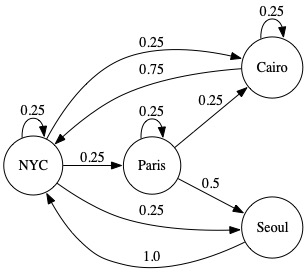

In [148]:
import networkx as nx
from graphviz import Digraph
import pandas as pd
from IPython.display import Image

df = mc.rename_axis('source')\
            .reset_index()\
            .melt('source', value_name='weight', var_name='target')\
            .reset_index(drop=True)

G = Digraph(format='jpeg')

G.attr(rankdir='LR', size='8,5')
G.attr('node', shape='circle')

nodelist = []
print(len(df))
for idx, row in df.iterrows():
    node1, node2, weight = [str(i) for i in row]
    
    if float(weight) == 0.0:
        continue
    else:
        if node1 not in nodelist:
            G.node(node1)
            nodelist.append(node2)
        if node2 not in nodelist:
            G.node(node2)
            nodelist.append(node2)

        G.edge(node1,node2, label = weight)

fname = './sg'
G.render(fname, view=False)
Image(fname+'.jpeg')